# NAME:NITHYASRI
# REG_NO:20MIA1017
# DIGITAL ASSIGNMENT -2
# BIG DATA ANALYTICS - MGT1062
# CANCER INSIGHTS: GLOBAL COMPARATIVE ANALYSIS

In [ ]:
import pandas as pd

# Step 1: Data Loading
# Load the datasets into pandas DataFrames
age_df = pd.read_csv("/content/age_editied.csv")
continent_df = pd.read_csv("/content/continent.csv")
death_df = pd.read_csv("/content/type_death_edited.csv")

# Display the first few rows of each DataFrame to check the data
print("Age DataFrame:")
print(age_df.head())
print("\nContinent DataFrame:")
print(continent_df.head())
print("\nDeath DataFrame:")
print(death_df.head())


Age DataFrame:
        Entity  Year   0-4 Years  5-14 Years  15-49 Years    70+ Years  \
0  Afghanistan  2000  431.431380  298.717520  2664.675562  3467.836503   
1  Afghanistan  2005  570.298566  607.532041  3574.085436  3716.360311   
2  Afghanistan  2010  454.028063  586.593832  4736.447964  3900.879913   
3  Afghanistan  2015  481.289410  620.663757  5749.126878  4091.136811   
4  Afghanistan  2017  511.048773  649.204879  5981.327823  4172.575864   

   50-69 Years  
0  5742.719807  
1  5569.999390  
2  4967.798862  
3  4960.120776  
4  5356.300571  

Continent DataFrame:
    Country continent
0    Canada    Africa
1   Algeria    Africa
2    Angola    Africa
3     Benin    Africa
4  Botswana    Africa

Death DataFrame:
        Entity        Year       Liver       Breast      Stomach        Colon  \
0  Afghanistan  2000-02-11  520.151550   699.287300  3279.165475   877.743536   
1  Afghanistan  2005-05-15  537.522807   823.753698  3478.610787   972.576772   
2  Afghanistan  2010-10

Missing values in Age DataFrame:
Entity         0
Year           0
0-4 Years      0
5-14 Years     0
15-49 Years    0
70+ Years      0
50-69 Years    0
dtype: int64

Summary Statistics:
             Year     0-4 Years    5-14 Years    15-49 Years     70+ Years  \
count   540.00000    540.000000    540.000000     540.000000  5.400000e+02   
mean   2009.40000    400.825847    525.993119    7568.795012  2.570327e+04   
std       6.28595   1161.044901   1729.185921   30440.801849  9.611533e+04   
min    2000.00000      0.292137      0.543382      11.473410  7.783328e+00   
25%    2005.00000     14.421515     25.644653     625.733359  1.598281e+03   
50%    2010.00000     63.463599    100.993954    1627.606031  3.988756e+03   
75%    2015.00000    273.414320    279.170752    3714.101102  1.513382e+04   
max    2017.00000  12348.431641  21021.700983  354425.644678  1.130670e+06   

        50-69 Years  
count  5.400000e+02  
mean   2.329606e+04  
std    9.919199e+04  
min    1.322805e+01  
2

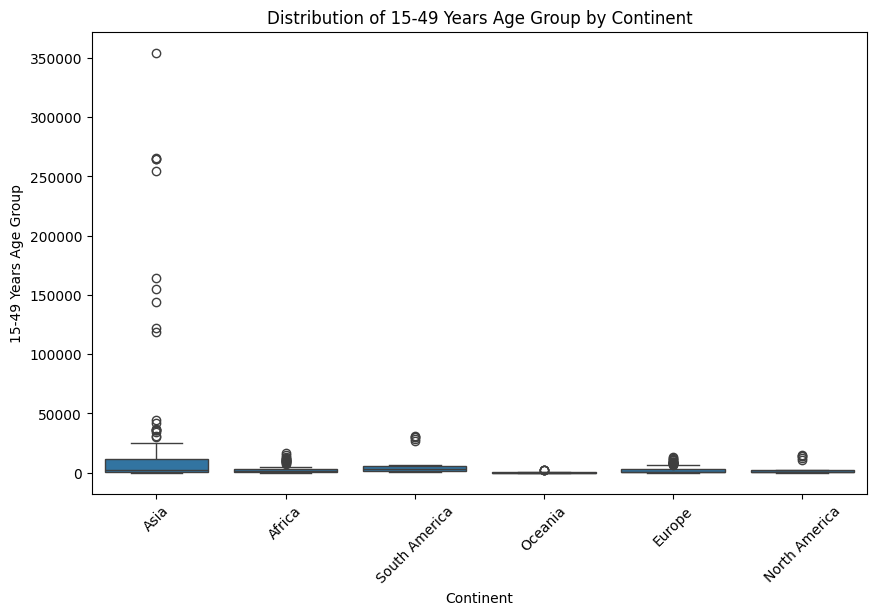

In [ ]:
# Step 3: Data Preprocessing
# Check for missing values and handle them if necessary
print("Missing values in Age DataFrame:")
print(age_df.isnull().sum())

# Step 4: Data Integration
# Merge the age_df and continent_df DataFrames based on the country column
merged_df = pd.merge(age_df, continent_df, left_on='Entity', right_on='Country', how='inner')
# Drop the redundant 'Country' column after merging
merged_df.drop(columns=['Country'], inplace=True)

# Step 5: Exploratory Data Analysis (EDA)
# Explore the data to gain insights
# Example: Calculate summary statistics for numerical columns
print("\nSummary Statistics:")
print(merged_df.describe())

# Example: Visualize the distribution of age groups by continent
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='continent', y='15-49 Years')
plt.title("Distribution of 15-49 Years Age Group by Continent")
plt.xlabel("Continent")
plt.ylabel("15-49 Years Age Group")
plt.xticks(rotation=45)
plt.show()


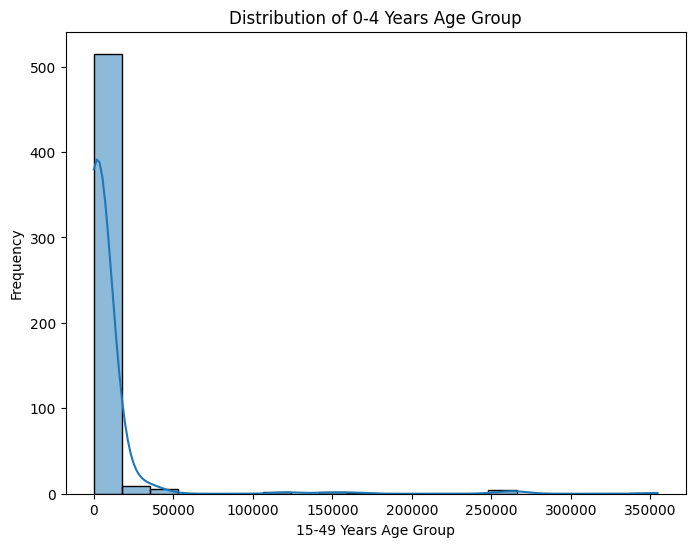

In [ ]:
# Histogram of a numerical variable (e.g., 15-49 Years)
plt.figure(figsize=(8, 6))
sns.histplot(data=merged_df, x='15-49 Years', bins=20, kde=True)
plt.title("Distribution of 0-4 Years Age Group")
plt.xlabel("15-49 Years Age Group")
plt.ylabel("Frequency")
plt.show()

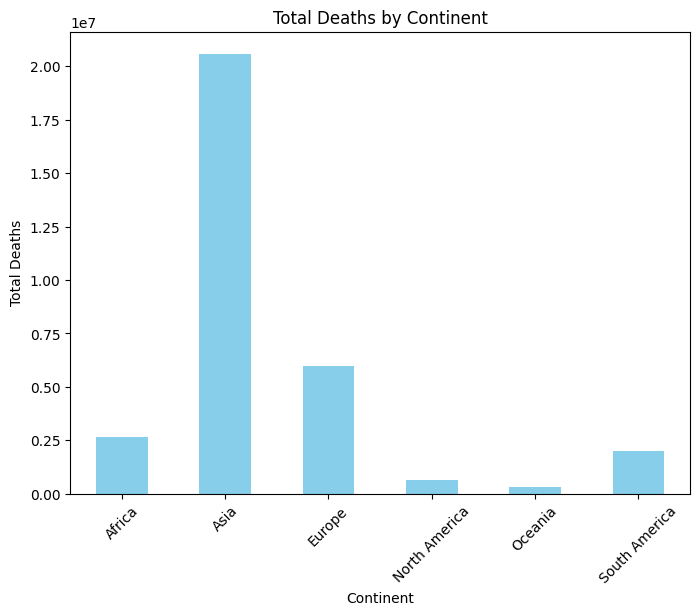

In [ ]:
# Bar plot of total deaths by continent
# Exclude non-numeric columns before summing
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns
total_deaths_by_continent = merged_df.groupby('continent')[numeric_columns].sum().sum(axis=1)

# Plot the total deaths by continent
plt.figure(figsize=(8, 6))
total_deaths_by_continent.plot(kind='bar', color='skyblue')
plt.title("Total Deaths by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.show()

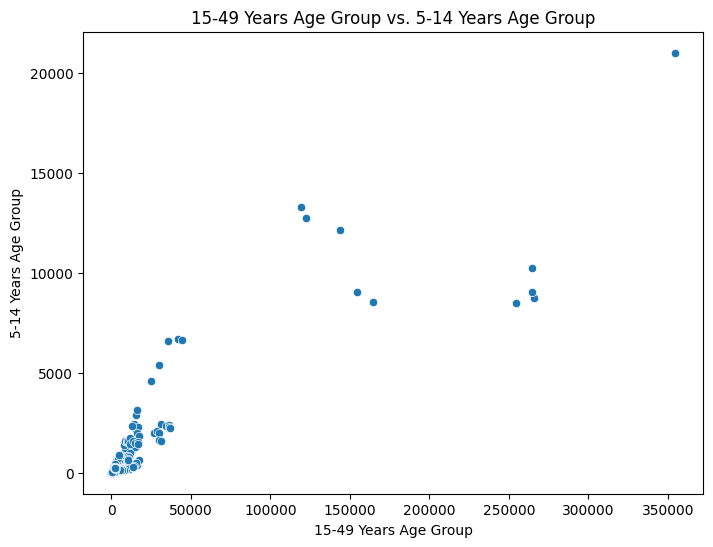

In [ ]:
# Scatter plot of two numerical variables
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='15-49 Years', y='5-14 Years')
plt.title("15-49 Years Age Group vs. 5-14 Years Age Group")
plt.xlabel("15-49 Years Age Group")
plt.ylabel("5-14 Years Age Group")
plt.show()


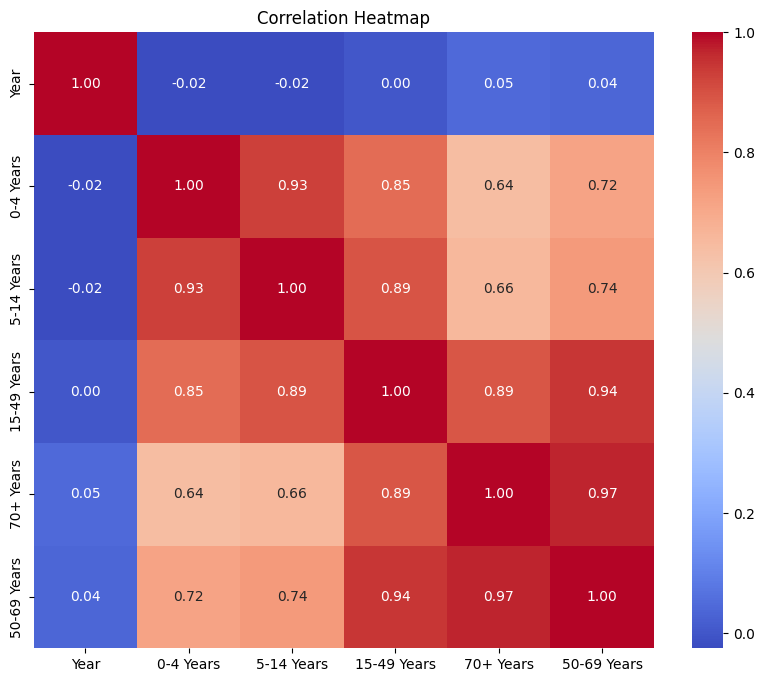

In [ ]:
# Exclude non-numeric columns before plotting the heatmap
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


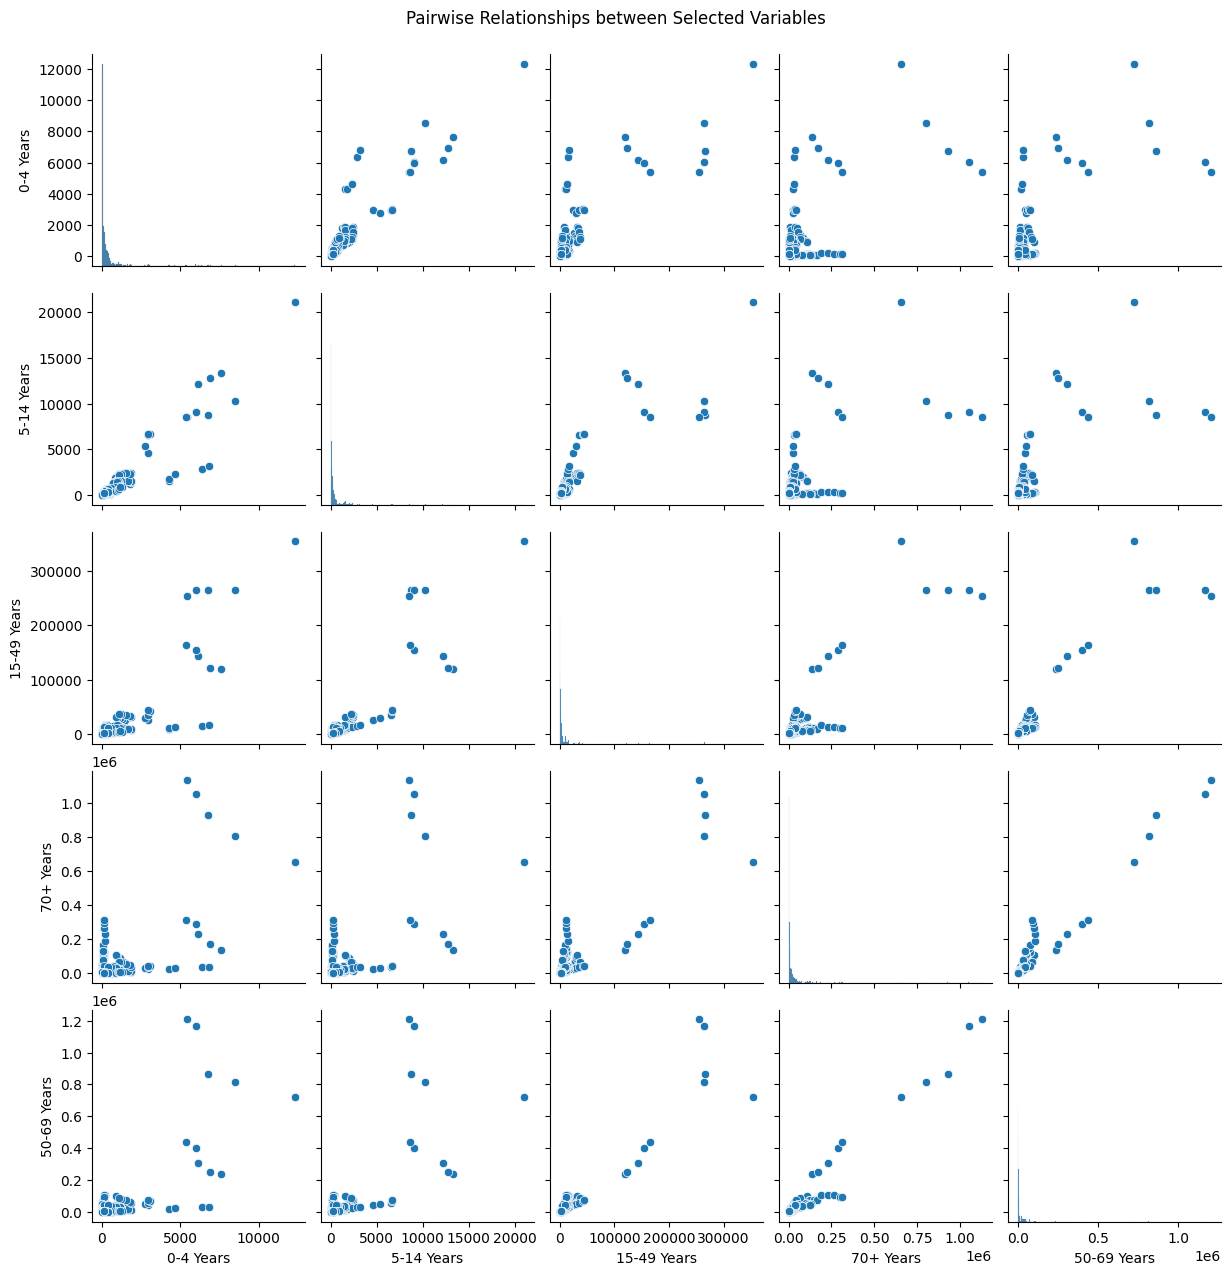

In [ ]:
# Pair plot of selected numerical variables
# Select numerical columns for the pair plot
numeric_columns_subset = ['0-4 Years', '5-14 Years', '15-49 Years', '70+ Years', '50-69 Years']

# Create the pair plot
sns.pairplot(merged_df[numeric_columns_subset])
plt.suptitle("Pairwise Relationships between Selected Variables", y=1.02)
plt.show()

In [ ]:
print(merged_df.columns)

Index(['Entity', 'Year', '0-4 Years', '5-14 Years', '15-49 Years', '70+ Years',
       '50-69 Years', 'continent'],
      dtype='object')


In [ ]:
# Merge the datasets based on the 'Country' column from continent_df and 'Entity' column from age_df
merged_df = pd.merge(age_df, continent_df, left_on='Entity', right_on='Country', how='inner')

# Drop the duplicate 'Country' column
merged_df.drop(columns=['Country'], inplace=True)

# Display the merged DataFrame
print(merged_df.head())


        Entity  Year   0-4 Years  5-14 Years  15-49 Years    70+ Years  \
0  Afghanistan  2000  431.431380  298.717520  2664.675562  3467.836503   
1  Afghanistan  2005  570.298566  607.532041  3574.085436  3716.360311   
2  Afghanistan  2010  454.028063  586.593832  4736.447964  3900.879913   
3  Afghanistan  2015  481.289410  620.663757  5749.126878  4091.136811   
4  Afghanistan  2017  511.048773  649.204879  5981.327823  4172.575864   

   50-69 Years continent  
0  5742.719807      Asia  
1  5569.999390      Asia  
2  4967.798862      Asia  
3  4960.120776      Asia  
4  5356.300571      Asia  


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Step 6: Feature Engineering (if needed)
# Let's use '0-4 Years', '5-14 Years', '70+ Years', '50-69 Years', and 'continent' as features
X = merged_df[['0-4 Years', '5-14 Years', '70+ Years', '50-69 Years', 'continent']]

# '15-49 Years' will be our target variable
y = merged_df['15-49 Years']

# Convert categorical variable 'continent' into dummy/indicator variables
X = pd.get_dummies(X, columns=['continent'], drop_first=True)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Building (Using Random Forest Regression)
# Initialize and train the random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)


from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared (Random Forest):", r_squared)



R-squared (Random Forest): 0.9823624246309175


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 6: Feature Engineering (if needed)
# Let's use '0-4 Years', '5-14 Years', '15-49 Years', '70+ Years', and '50-69 Years' as features
X = merged_df[['0-4 Years', '5-14 Years', '15-49 Years', '70+ Years', '50-69 Years']]

# 'continent' will be our target variable
y = merged_df['continent']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Model Building (Using Random Forest Classifier)
# Initialize and train the random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 9: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest Classifier):", accuracy)


Accuracy (Random Forest Classifier): 0.8611111111111112


In [ ]:
# Display the first few rows of the dataset
print(death_df.head())

# Check for missing values and data types
print(death_df.info())

        Entity        Year       Liver       Breast      Stomach        Colon  \
0  Afghanistan  2000-02-11  520.151550   699.287300  3279.165475   877.743536   
1  Afghanistan  2005-05-15  537.522807   823.753698  3478.610787   972.576772   
2  Afghanistan  2010-10-13  552.162610   991.760186  3443.931112  1058.201622   
3  Afghanistan  2015-06-08  591.062876  1203.319424  3504.978045  1179.493507   
4  Afghanistan  2017-07-07  612.903603  1295.551117  3613.893258  1248.740056   

   Brain and nervous system     Leukemia  
0                653.620084  1143.061398  
1                816.578966  1495.370696  
2                817.041138  1548.931410  
3                907.179468  1729.618747  
4                961.102864  1827.926735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    540 non-nu

In [ ]:
# Data Preparation
# Extract year from the 'Year' column
death_df['Year'] = pd.to_datetime(death_df['Year']).dt.year

# Display the updated DataFrame
print(death_df.head())

# Check for missing values and data types
print(death_df.info())


        Entity  Year       Liver       Breast      Stomach        Colon  \
0  Afghanistan  2000  520.151550   699.287300  3279.165475   877.743536   
1  Afghanistan  2005  537.522807   823.753698  3478.610787   972.576772   
2  Afghanistan  2010  552.162610   991.760186  3443.931112  1058.201622   
3  Afghanistan  2015  591.062876  1203.319424  3504.978045  1179.493507   
4  Afghanistan  2017  612.903603  1295.551117  3613.893258  1248.740056   

   Brain and nervous system     Leukemia  
0                653.620084  1143.061398  
1                816.578966  1495.370696  
2                817.041138  1548.931410  
3                907.179468  1729.618747  
4                961.102864  1827.926735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Entity                    540 non-null    object 
 1   Year             

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering
# Select features (Entity and Year)
X = death_df[['Entity', 'Year']]

# Target variables (Number of deaths for each type)
y = death_df.drop(columns=['Entity', 'Year'])

# Encode categorical variable 'Entity' (Country) using one-hot encoding
X = pd.get_dummies(X, columns=['Entity'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Using Random Forest Regression)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared (Random Forest):", r_squared)


R-squared (Random Forest): 0.9740442592124632


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select a single type of death as the target variable
threshold = 500  # Define a threshold for the number of deaths (you can adjust this value)
y = (death_df['Liver'] > threshold).astype(int)  # Binary classification based on the threshold

# Select features (Entity and Year)
X = death_df[['Entity', 'Year']]

# Encode categorical variable 'Entity' (Country) using one-hot encoding
X = pd.get_dummies(X, columns=['Entity'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building (Using Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Random Forest Classifier):", accuracy)


Accuracy (Random Forest Classifier): 0.8981481481481481


In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Building (Using Logistic Regression)
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Model Evaluation
y_pred_logistic = logistic_model.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)


Accuracy (Logistic Regression): 0.8703703703703703


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy (Best Model):", accuracy_best)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (Accuracy): 0.9052125100240577
Accuracy (Best Model): 0.8981481481481481
